In [1]:
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler, LabelEncoder
label_encoder = LabelEncoder()

In [4]:
baredf = pd.read_csv("../data/nsl/KDDTrain+.txt")

In [5]:
baredf.tail(5)

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125971,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal,21


In [6]:
baredf.shape

(125972, 43)

In [7]:
baredf.dtypes

0             int64
tcp          object
ftp_data     object
SF           object
491           int64
0.1           int64
0.2           int64
0.3           int64
0.4           int64
0.5           int64
0.6           int64
0.7           int64
0.8           int64
0.9           int64
0.10          int64
0.11          int64
0.12          int64
0.13          int64
0.14          int64
0.15          int64
0.16          int64
0.18          int64
2             int64
2.1           int64
0.00        float64
0.00.1      float64
0.00.2      float64
0.00.3      float64
1.00        float64
0.00.4      float64
0.00.5      float64
150           int64
25            int64
0.17        float64
0.03        float64
0.17.1      float64
0.00.6      float64
0.00.7      float64
0.00.8      float64
0.05        float64
0.00.9      float64
normal       object
20            int64
dtype: object

In [8]:
for col in baredf.columns:
    if baredf[col].dtype == "object":
        print(f'{col}: uniqs: {baredf[col].value_counts()} ')

tcp: uniqs: tcp
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64 
ftp_data: uniqs: ftp_data
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64 
SF: uniqs: SF
SF        74944
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64 
normal: uniqs: normal
normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11

In [9]:
baredf.normal = baredf.apply( lambda x: 0 if x.normal == 'normal' else 1, axis=1)

In [10]:
baredf['tcp'] = label_encoder.fit_transform(baredf['tcp'])
baredf['SF'] = label_encoder.fit_transform(baredf['SF'])
baredf['ftp_data'] = label_encoder.fit_transform(baredf['ftp_data'])

In [11]:
baredf = pd.DataFrame(MaxAbsScaler().fit_transform(baredf))

In [12]:
ben = baredf[baredf[41] == 0]
att = baredf[baredf[41] != 0]

In [13]:
ben.shape

(67342, 43)

In [14]:
att.shape

(58630, 43)

In [15]:
ben = ben.iloc[:50000, :]
ben.shape

(50000, 43)

In [16]:
att = att.iloc[:50000, :]
att.shape

(50000, 43)

In [22]:
baredf.shape

(125972, 43)

In [23]:
baredf = pd.concat([att, ben])

In [24]:
baredf.shape

(100000, 43)

In [17]:
baredf.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
125967,0.000000,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,1.0,0.952381
125968,0.000186,1.0,0.710145,0.9,7.608895e-08,1.106923e-07,0.0,0.0,0.0,0.0,...,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,0.0,1.000000
125969,0.000000,0.5,0.782609,0.9,1.616709e-06,2.931438e-07,0.0,0.0,0.0,0.0,...,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,0.0,0.857143
125970,0.000000,0.5,0.434783,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,1.0,0.952381
125971,0.000000,0.5,0.289855,0.9,1.094232e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,0.0,1.000000


In [25]:
x=baredf.iloc[:,:-2]
y=baredf[41]

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, roc_curve, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

In [27]:
treinoX, testeX, treinoY, testey = train_test_split(x, y, train_size=0.7, random_state=42)

In [28]:
dt = DecisionTreeClassifier(min_samples_split=10)
dt.fit(treinoX, treinoY)
dtPred = dt.predict(testeX)
accuracy_score(testey, dtPred)

0.9965333333333334

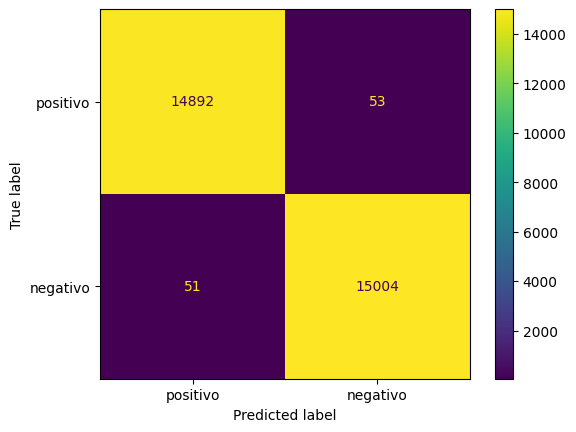

In [29]:
dtmc = confusion_matrix(testey, dtPred)
ConfusionMatrixDisplay(dtmc, display_labels=['positivo', 'negativo']).plot()

In [18]:
baredf.to_csv('nslClean.csv', index=False)